## Figure 5 reproduction

In this notebook, we will showcase Figure 5, Dynamic Time Warping and its behavior on different time series.

<img src="paper_figures/dtw.png" alt="Figure 5" width="600"/>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), "../experiments/src"))

sys.path.append(src_path)

from dtw_measure import dtw_measure

In [9]:
list1 = np.array([5, 6, 8, 6, 2, 5, 7])
list2 = np.array([5, 6, 8, 6, 2, 5, 7])

list12 = np.array([5, 6, 8, 6, 2, 5, 7])
list22 = np.array([5, 6, 9, 6, 3, 5, 7])

list13 = np.array([5, 6, 8, 6, 2, 5, 7])
list23 = np.array([5, 6, 7, 9, 6, 3, 5])

Text(0.5, 1.0, 'Time Series Pair 3')

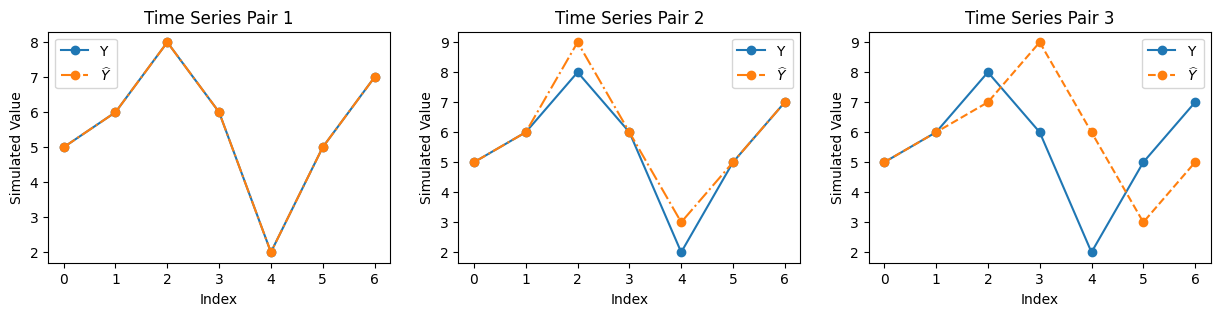

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].plot(list1, label="Y", marker='o')
ax[0].plot(list2, label=r"$\widehat{Y}$", marker='o', linestyle='-.')
ax[0].legend()
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Simulated Value")
ax[0].set_title("Time Series Pair 1")

ax[1].plot(list12, label="Y", marker='o')
ax[1].plot(list22, label=r"$\widehat{Y}$", marker='o', linestyle='-.')
ax[1].legend()
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Simulated Value")
ax[1].set_title("Time Series Pair 2")

ax[2].plot(list13, label="Y", marker='o')
ax[2].plot(list23, label=r"$\widehat{Y}$", marker='o', linestyle='dashed')
ax[2].legend()
ax[2].set_xlabel("Index")
ax[2].set_ylabel("Simulated Value")
ax[2].set_title("Time Series Pair 3")


In [11]:
M, path, cost = dtw_measure(list1, list2)
M2, path2, cost2 = dtw_measure(list12, list22)
M3, path3, cost23 = dtw_measure(list13, list23)

bins, counts = np.unique(abs(path[0, :] - path[1, :]), return_counts=True)
bins2, counts2 = np.unique(abs(path2[0, :] - path2[1, :]), return_counts=True)
bins3, counts3 = np.unique(abs(path3[0, :] - path3[1, :]), return_counts=True)

diagonal_sum = sum(M[i, i] for i in range(min(M.shape)))
diagonal_sum2 = sum(M2[i, i] for i in range(min(M2.shape)))
diagonal_sum3 = sum(M3[i, i] for i in range(min(M3.shape)))


Text(2.9, -0.3, 'Diagonal Values Sum: 12.0')

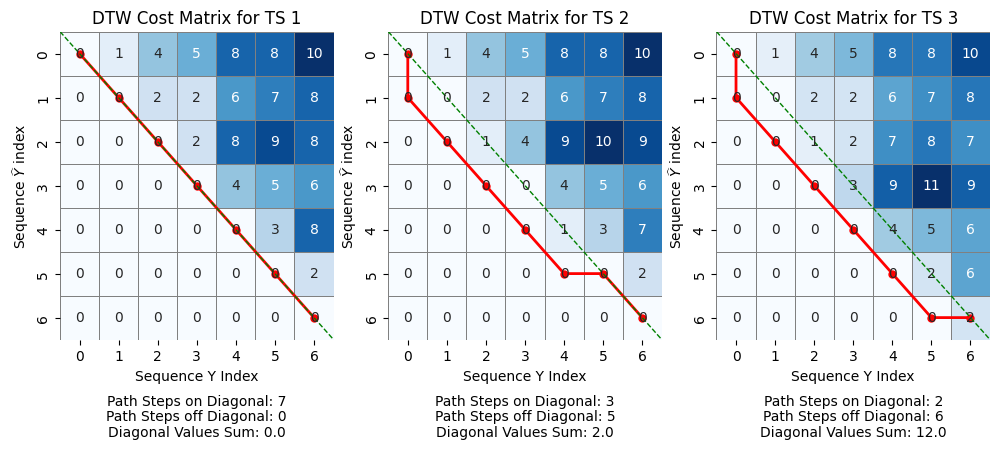

In [13]:
path_x, path_y = path[0], path[1]
path_x2, path_y2 = path2[0], path2[1]
path_x3, path_y3 = path3[0], path3[1]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(M, cmap='Blues', annot=True, linewidths=0.5, linecolor='gray', cbar=False, ax=ax[0])
ax[0].plot(path_y + 0.5, path_x + 0.5, color='red', linewidth=2, marker='o', markersize=5)
ax[0].plot([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], color='green', linewidth=1, linestyle="dashed")
ax[0].set_xlabel("Sequence Y Index")
ax[0].set_ylabel(r"Sequence $\widehat{Y}$ index")
ax[0].set_title("DTW Cost Matrix for TS 1")
ax[0].text(0.5, -0.2, f"Path Steps on Diagonal: {counts[0]}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
ax[0].text(0.5, -0.25, f"Path Steps off Diagonal: {0}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
ax[0].text(0.5, -0.3, f"Diagonal Values Sum: {diagonal_sum}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)

sns.heatmap(M2, cmap='Blues', annot=True, linewidths=0.5, linecolor='gray', cbar=False, ax=ax[1])
ax[1].plot(path_y2 + 0.5, path_x2 + 0.5, color='red', linewidth=2, marker='o', markersize=5)
ax[1].plot([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], color='green', linewidth=1, linestyle="dashed")
ax[1].set_xlabel("Sequence Y Index")
ax[1].set_ylabel(r"Sequence $\widehat{Y}$ index")
ax[1].set_title("DTW Cost Matrix for TS 2")
ax[1].text(1.7, -0.2, f"Path Steps on Diagonal: {counts2[0]}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
ax[1].text(1.7, -0.25, f"Path Steps off Diagonal: {counts2[1]}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
ax[1].text(1.7, -0.3, f"Diagonal Values Sum: {diagonal_sum2}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)

sns.heatmap(M3, cmap='Blues', annot=True, linewidths=0.5, linecolor='gray', cbar=False, ax=ax[2])
ax[2].plot(path_y3 + 0.5, path_x3 + 0.5, color='red', linewidth=2, marker='o', markersize=5)
ax[2].plot([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], color='green', linewidth=1, linestyle="dashed")
ax[2].set_xlabel("Sequence Y Index")
ax[2].set_ylabel(r"Sequence $\widehat{Y}$ index")
ax[2].set_title("DTW Cost Matrix for TS 3")
ax[2].text(2.9, -0.2, f"Path Steps on Diagonal: {counts3[0]}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
ax[2].text(2.9, -0.25, f"Path Steps off Diagonal: {counts3[1]}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
ax[2].text(2.9, -0.3, f"Diagonal Values Sum: {diagonal_sum3}", ha='center', va='center', transform=ax[0].transAxes, fontsize=10)
